# MNIST

In [1]:
from conx import Network, Layer, Conv2DLayer, MaxPool2DLayer, FlattenLayer

Using Theano backend.


In [2]:
net = Network("MNIST")
net.add(Layer("input", shape=784, vshape=(28, 28), colormap="hot", minmax=(0,1)))
net.add(Layer("hidden1", shape=512, vshape=(16,32), activation='relu', dropout=0.2))
net.add(Layer("hidden2", shape=512, vshape=(16,32), activation='relu', dropout=0.2))
net.add(Layer("output", shape=10, activation='softmax'))

net.connect('input', 'hidden1')
net.connect('hidden1', 'hidden2')
net.connect('hidden2', 'output')

In [3]:
net.compile(loss='mean_squared_error',
            optimizer='sgd')

In [4]:
from keras.utils.vis_utils import model_to_dot
from IPython.display import SVG

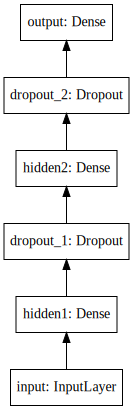

In [5]:
SVG(model_to_dot(net.model, rankdir="BT").create_svg())

In [6]:
net.load_mnist_dataset()
#net.rescale_inputs((0,255), (0,1), 'float32')
#net.shuffle_dataset()
net.slice_dataset(0, 100)
net.reshape_inputs(784)
#net.split_dataset(100)

Input Summary:
   length  : 70000
   training: 70000
   testing : 0
   shape  : (28, 28, 1)
   range  : (0.0, 1.0)
Target Summary:
   length  : 70000
   training: 70000
   testing : 0
   shape  : (10,)
   range  : (0.0, 1.0)
Slicing dataset 0:100...
Input Summary:
   length  : 100
   training: 100
   testing : 0
   shape  : (28, 28, 1)
   range  : (0.0, 1.0)
Target Summary:
   length  : 100
   training: 100
   testing : 0
   shape  : (10,)
   range  : (0.0, 1.0)
Input Summary:
   length  : 100
   training: 100
   testing : 0
   shape  : (784,)
   range  : (0.0, 1.0)
Target Summary:
   length  : 100
   training: 100
   testing : 0
   shape  : (10,)
   range  : (0.0, 1.0)


In [8]:
widget = net.build_widget()

<IPython.core.display.Javascript object>

In [9]:
widget

In [10]:
net.train(100, verbose=0)
#net.test()

(100, 0.089887954294681549, 0.17000000178813934, 0.0)

In [11]:
%%time
for i in range(100):
    net.propagate(net.get_input(i))

CPU times: user 5.94 s, sys: 272 ms, total: 6.21 s
Wall time: 6.21 s


In [12]:
from conx import Network, Layer, Conv2DLayer, MaxPool2DLayer, FlattenLayer

In [13]:
net = Network("MNIST-CNN")
net.add(Layer("input", (28,28,1), colormap="hot", minmax=(0,1)))
net.add(Conv2DLayer("Conv2D-1", 16, (5,5), activation="relu"))
net.add(MaxPool2DLayer("maxpool1", (2,2)))
net.add(Conv2DLayer("Conv2D-2", 132, (5,5), activation="relu")) 
net.add(MaxPool2DLayer("maxpool2", (2,2)))
net.add(FlattenLayer("flatten", visible=False))
net.add(Layer("hidden", 1000, activation='relu', vshape=(8,125), image_maxdim=500))
net.add(Layer("output", 10, activation='softmax'))

net.connect()

In [14]:
net.compile(loss="binary_crossentropy", optimizer="rmsprop")

In [15]:
net.load_mnist_dataset()

Input Summary:
   length  : 70000
   training: 70000
   testing : 0
   shape  : (28, 28, 1)
   range  : (0.0, 1.0)
Target Summary:
   length  : 70000
   training: 70000
   testing : 0
   shape  : (10,)
   range  : (0.0, 1.0)


In [16]:
net.slice_dataset(100)

Slicing dataset 0:100...
Input Summary:
   length  : 100
   training: 100
   testing : 0
   shape  : (28, 28, 1)
   range  : (0.0, 1.0)
Target Summary:
   length  : 100
   training: 100
   testing : 0
   shape  : (10,)
   range  : (0.0, 1.0)


In [17]:
net.train()

Training...
Epoch 1/1
100/100 [==============================] - 0s - loss: 0.3253 - acc: 0.9000
Epoch #    1 | train error 0.32531 | train accuracy 0.90000 | validate% 0.00000


In [19]:
net.build_widget()

<IPython.core.display.Javascript object>

In [20]:
for i in range(10):
    net.propagate(net.get_input(i))

In [21]:
net.train(epochs=100, accuracy=.7)

Training...
Epoch #    2 | train error 0.30300 | train accuracy 0.90200 | validate% 0.00000
Epoch #    3 | train error 0.29061 | train accuracy 0.90000 | validate% 0.00000
Epoch #    4 | train error 0.23864 | train accuracy 0.91000 | validate% 0.21000
Epoch #    5 | train error 0.21296 | train accuracy 0.90800 | validate% 0.00000
Epoch #    6 | train error 0.28020 | train accuracy 0.91800 | validate% 0.00000
Epoch #    7 | train error 0.20783 | train accuracy 0.93200 | validate% 0.15000
Epoch #    8 | train error 0.15654 | train accuracy 0.93800 | validate% 0.16000
Epoch #    9 | train error 0.10267 | train accuracy 0.96200 | validate% 0.35000
Epoch #   10 | train error 0.07205 | train accuracy 0.98000 | validate% 0.33000
Epoch #   11 | train error 0.07664 | train accuracy 0.97600 | validate% 0.50000
Epoch #   12 | train error 0.09073 | train accuracy 0.96900 | validate% 0.52000
Epoch #   13 | train error 0.06328 | train accuracy 0.98200 | validate% 0.60000
Epoch #   14 | train error 0